Database from Kaggle:
https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

An Exploratory Data Analysis of NTSB Aviation Accident Database has been conducted. This database includes information from 1948 and onwards, covering civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

The goal of the analysis is to gain insights into improving the quality and safety of air travel  
and uncover patterns in the probability of fatalities.

Conclusions:

-Most accidents occur in the summer, with the peak in July.  
-Accidents are more likely during good weather conditions (visual meteorological conditions).  
-Certain regions in the United States, such as California, Alaska, Florida, and Texas, exhibit an increased probability of accidents.  
-Specific airplane makes are more frequently involved in crashes.  
-The takeoff and landing phases pose the highest risk during a flight.  
-Over 50% of accidents happen during personal flights.  


Recommendations:  

Considering the above findings, it is advisable to strengthen safety regulations and procedures, especially focusing on protocols for good weather conditions. Initiatives such as training programs, awareness campaigns, and the promotion of responsible flying can contribute to reducing risky behavior, thereby lowering accident rates.

Moreover, the higher accident rates in mentioned states underscore the importance of reviewing safety regulations at airports within those regions.

Given that a significant number of accidents occur during personal flights, a re-evaluation of the pilot's licensing process is warranted.

Additionally, a more in-depth analysis of specific makes and models of airplanes, incorporating detailed technical data, would provide a comprehensive understanding of their impact on accident rates.

As modelling the death ratio and the number of fatal injuries has not yielded satisfactory conclusions, further analysis and data exploration are necessary to identify any patterns in the aviation accidents data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape, r2_score

In [2]:
aviation = pd.read_csv("AviationData.csv", encoding='latin-1', low_memory=False)


In [3]:
pd.set_option('display.max_columns', None)
aviation.shape

(88889, 31)

In [4]:
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
aviation.sample(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
81942,20180719X03724,Accident,ERA18LA195,2018-07-18,"Ider, AL",United States,344251N,0854051W,NaN,NaN,Non-Fatal,Substantial,Airplane,N8805X,Eagle,DW1,No,1.0,Reciprocating,137,NaN,Aerial Application,NaN,0.0,0.0,0.0,1.0,VMC,NaN,Fatigue failure of the No. 2 cylinder studs/th...,25-09-2020
50790,20010621X01234,Accident,CHI01LA173,2001-06-16,"CAMBRIDGE, NE",United States,40.306667,-100.161944,CSB,CAMBRIDGE MUNICIPAL AIRPORT,Non-Fatal,Substantial,NaN,N494SP,Cessna,172S,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,NaN,NaN,NaN,2.0,VMC,Cruise,Probable Cause,23-11-2001
60566,20060603X00679,Accident,LAX06CA152,2006-04-30,"PHOENIX, AZ",United States,33.691666,-112.076111,DVT,Phoenix Deer Valley,Non-Fatal,Substantial,Airplane,N449PA,Piper,PA-44-180,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,NaN,NaN,NaN,2.0,VMC,Go-around,Probable Cause,29-08-2006
11804,20001214X36371,Accident,ATL85LA176,1985-05-31,"COLUMBIA, SC",United States,NaN,NaN,CAE,COLUMBIA METRO,Non-Fatal,Substantial,NaN,N5221F,Cessna,172,No,1.0,Reciprocating,NaN,NaN,Business,NaN,0.0,0.0,0.0,1.0,VMC,Descent,Probable Cause,NaN
25559,20001212X23050,Accident,ANC90LA074,1990-05-23,"PALMER, AK",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N66425,Cessna,150,No,1.0,Reciprocating,NaN,NaN,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Other,Probable Cause,28-08-1992
88053,20220627105366,Accident,WPR22LA231,2022-06-27,"Missoula, MT",United States,465459N,0114526W,MSO,MISSOULA INTL,Serious,Substantial,Airplane,N12VV,JAMES C GEYMAN,RV-9A,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,1.0,0.0,VMC,NaN,NaN,11-07-2022
2878,20020917X05043,Accident,NYC82DA234,1982-09-25,"HYANNIS, MA",United States,NaN,NaN,HYA,HYANNIS,Non-Fatal,Substantial,Airplane,N4149U,Cessna,150D,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,25-09-1983
74182,20131107X31340,Incident,DCA13WA170,2013-09-01,"Dar Es Salaam, Tanzania, United Republic of",Tanzania,061350S,0391340E,NaN,NaN,NaN,Minor,Airplane,A40-BB,BOEING,737,No,NaN,NaN,NUSC,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,25-09-2020
51096,20010731X01562,Accident,ATL01LA091,2001-07-23,"ASHLAND CITY, TN",United States,36.3,-87.066667,TN77,WHIFFERDILL,Non-Fatal,Substantial,NaN,N3221X,Mitchell Aircraft Corp,T-10,Yes,1.0,Reciprocating,NaN,NaN,Personal,NaN,NaN,2.0,NaN,NaN,VMC,Climb,Probable Cause,23-07-2003
34204,20001211X13787,Accident,MIA94LA029,1993-11-26,"MOORE HAVEN, FL",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N130HA,Hiller,UH-12E,No,1.0,Reciprocating,NaN,UNK,Aerial Application,NaN,0.0,0.0,1.0,0.0,VMC,Maneuvering,Probable Cause,13-09-1994


In [6]:
aviation.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [7]:
#creating a copy of an original dataframe
original_aviation = aviation.copy()

In [8]:
#listing columns that contain Nans (As there are 27 columns that are incomplete, there is a need to consider how to handle the issue.)
missing_data_col = aviation.columns[aviation.isna().any()].tolist()
missing_data_col, len(missing_data_col)

(['Location',
  'Country',
  'Latitude',
  'Longitude',
  'Airport.Code',
  'Airport.Name',
  'Injury.Severity',
  'Aircraft.damage',
  'Aircraft.Category',
  'Registration.Number',
  'Make',
  'Model',
  'Amateur.Built',
  'Number.of.Engines',
  'Engine.Type',
  'FAR.Description',
  'Schedule',
  'Purpose.of.flight',
  'Air.carrier',
  'Total.Fatal.Injuries',
  'Total.Serious.Injuries',
  'Total.Minor.Injuries',
  'Total.Uninjured',
  'Weather.Condition',
  'Broad.phase.of.flight',
  'Report.Status',
  'Publication.Date'],
 27)

In [9]:
#creating a function removing columns with missing data above established threshold and listing the removed columns

def drop_columns(df, thr = 0.5):
    missing_percentages = df.isna().mean()
    col_to_drop = missing_percentages[missing_percentages > thr].index
    new_df=df.drop(columns = col_to_drop)
    return new_df, list(col_to_drop)
    
    

In [10]:
# There are 6 columns to be removed when threshold 0.5 is applied.
dropped_col_df, dropped_columns = drop_columns(aviation, 0.5)
dropped_columns

['Latitude',
 'Longitude',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

In [11]:
# There are 8 columns to be removed when threshold 0.4 is applied/
dropped_col_df, dropped_columns = drop_columns(aviation, 0.4)
dropped_columns

['Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

In [12]:
#I decide to perform an analysis applying the threshold 0.4.

dropped_col_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
#  checking the number of missing values


from tabulate import tabulate

def check_missing_values(df):
    pd.set_option('display.max_rows', None)
    print("The number of missing values in each column:")
    table_data = []
    for column in df.columns:
        missing_count = df[column].isna().sum()
        table_data.append([column, missing_count])

    print(tabulate(table_data, headers = ["Column", "No. of missing values"], tablefmt = "grid"))

    pd.reset_option('display.max_rows', None)

In [14]:
check_missing_values(dropped_col_df)

The number of missing values in each column:
+------------------------+-------------------------+
| Column                 |   No. of missing values |
+========================+=========================+
| Event.Id               |                       0 |
+------------------------+-------------------------+
| Investigation.Type     |                       0 |
+------------------------+-------------------------+
| Accident.Number        |                       0 |
+------------------------+-------------------------+
| Event.Date             |                       0 |
+------------------------+-------------------------+
| Location               |                      52 |
+------------------------+-------------------------+
| Country                |                     226 |
+------------------------+-------------------------+
| Injury.Severity        |                    1000 |
+------------------------+-------------------------+
| Aircraft.damage        |                    3194 |
+

In [15]:
#changing date (presented as string) to date format 
dropped_col_df["Event.Date"] = pd.to_datetime(dropped_col_df["Event.Date"])

In [16]:
# While analyzing outliers I discovered there were two accidents with the same date and the number of fatalities. It turned out these two planes crashed with each other. Data has been entered incorrectly - 349 is the total number of fatalities in both planes.
dropped_col_df.sort_values(by="Total.Fatal.Injuries", ascending=False).head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
40881,20020124X00116,Accident,DCA97WA007B,1996-11-12,"New Delhi, India",India,Fatal(349),NaN,NaN,Tupolev,TU-154,No,NaN,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002
40882,20020124X00116,Accident,DCA97WA007A,1996-11-12,"New Delhi, India",India,Fatal(349),NaN,NaN,Boeing,747-168,No,NaN,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002


In [17]:
#the DataFrame without any nans (all the missing values have been removed)

# dropped_col_df = dropped_col_df.dropna()
dropped_col_df["Year"] = dropped_col_df["Event.Date"].dt.year
dropped_col_df["Month"] = dropped_col_df["Event.Date"].dt.month
dropped_col_df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8


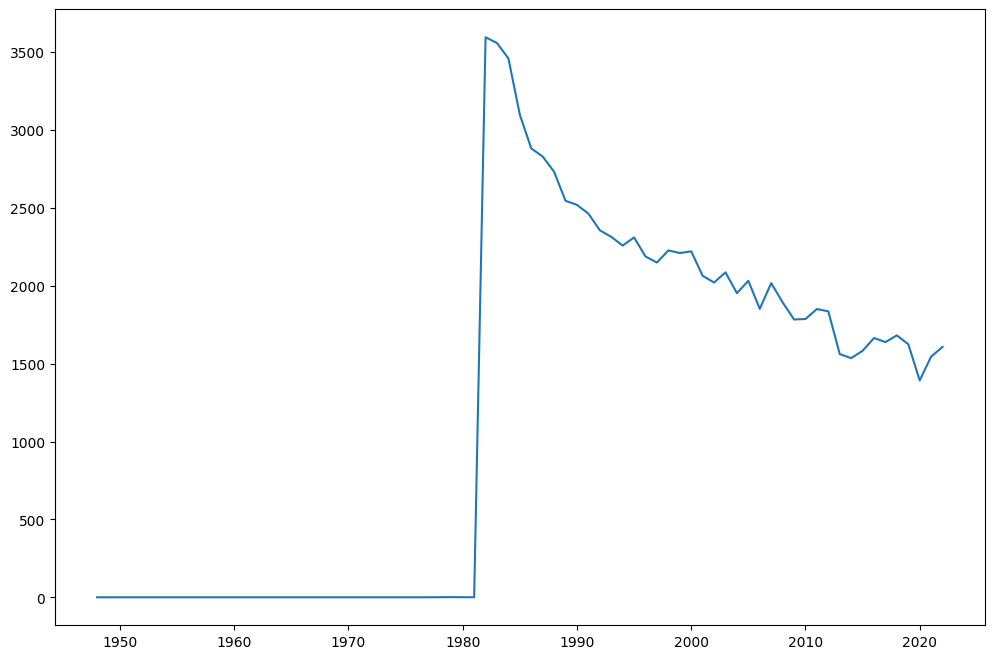

In [18]:
#data visualisation

accidents_by_year = dropped_col_df["Year"].value_counts().sort_index()


plt.figure(figsize=(12,8))
plt.plot(accidents_by_year.index, accidents_by_year.values)

In [19]:
dropped_col_df[dropped_col_df["Year"] < 1982]

#As there are only 7 records between 1948 and 1981, I will ilustrate the trend in accidents' number excluding these records.

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,9
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981,8


In [20]:
original_aviation["Event.Date"] = pd.to_datetime(original_aviation["Event.Date"])
original_aviation["Year"] = original_aviation["Event.Date"].dt.year
original_aviation_1982 = original_aviation[original_aviation["Year"] >=1982]
accidents_by_year_original = original_aviation["Year"].value_counts().sort_index()
accidents_by_year_1982 = original_aviation_1982["Year"].value_counts().sort_index()

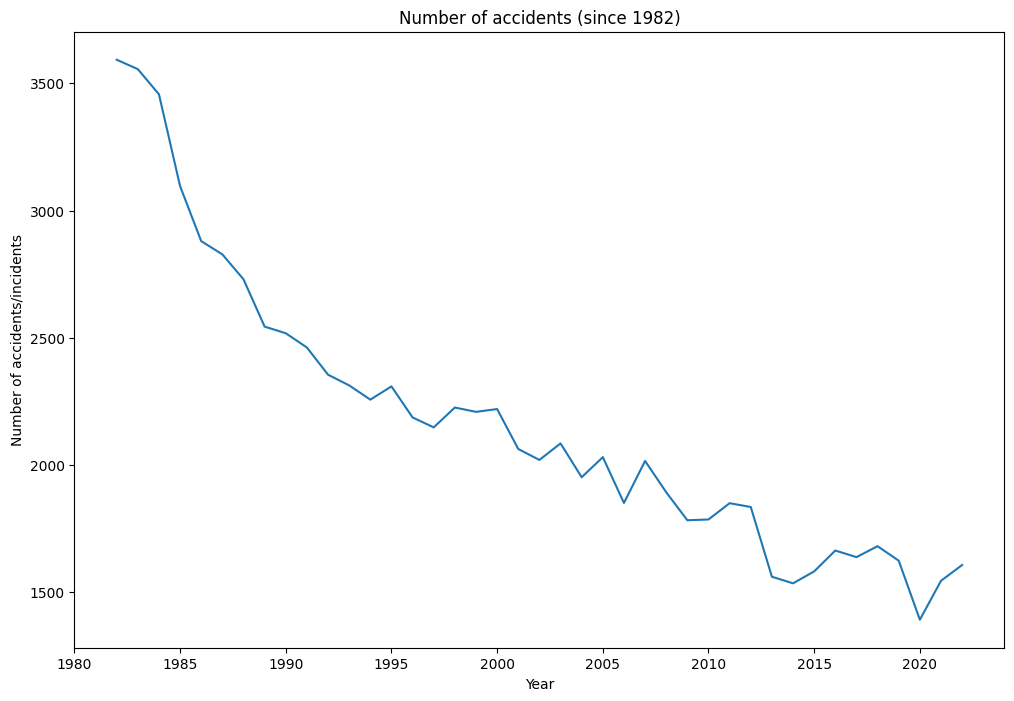

In [21]:
plt.figure(figsize=(12,8))
plt.plot(accidents_by_year_1982.index, accidents_by_year_1982.values)
plt.xlabel("Year")
plt.ylabel("Number of accidents/incidents")
plt.title("Number of accidents (since 1982)")
plt.show()

In [22]:
#creating dataframe of crashes that occurred in the area of the United States
df_usa = dropped_col_df[dropped_col_df["Country"] == "United States"]

In [23]:
import us

all_states = us.states.STATES

for state in all_states:
    print(state)


state_abbr = [state.abbr for state in all_states]

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [24]:
#adding a column with a particular state of USA
df_usa["State"] = df_usa["Location"].str[-2:]
df_usa

/tmp/ipykernel_44383/66544778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["State"] = df_usa["Location"].str[-2:]


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,12,MD
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,NH
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,12,AZ
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,UT


In [25]:
# A heatmap visualising the distribution of aviation accidents around the US
state_counts = df_usa['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

import plotly.express as px
fig = px.choropleth(
    state_counts,
    locations="State",
    locationmode="USA-states",
    color="Count",
    scope="usa",
    title="Distribution of accidents in USA",
    color_continuous_scale= 'Blues',
)
fig.update_layout(
    title=dict(
        x=0.5, 
        y=0.85,  
        xanchor='center',  
        yanchor='top'  
    ),
      legend=dict(
        x=0.3,  
        y=1.02,  
        xanchor='left',  
        yanchor='bottom'  
    )
)

fig.show()

In [26]:
#creating dictionary of seasons

seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}

dropped_col_df["Season"] = dropped_col_df["Month"].map(seasons)

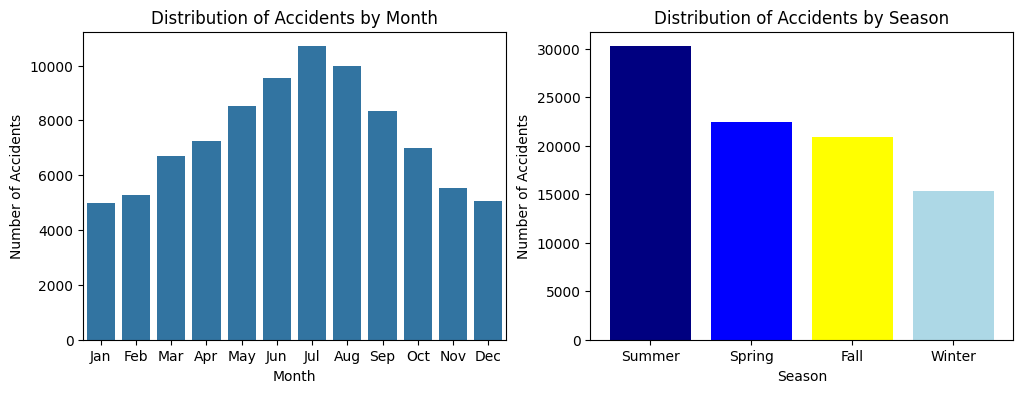

In [27]:
# Plot distribution of accidents by months and seasons

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.countplot(data=dropped_col_df, x='Month', ax=axes[0])
axes[0].set_title('Distribution of Accidents by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Accidents')
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(month_order)


season_colors = {
    'Winter': 'lightblue',
    'Spring': 'blue',
    'Summer': 'navy',
    'Fall': 'yellow'
}


seasonal_accident_counts = dropped_col_df['Season'].value_counts()


axes[1].bar(seasonal_accident_counts.index, seasonal_accident_counts, color=[season_colors.get(season, 'blue') for season in seasonal_accident_counts.index])
axes[1].set_title('Distribution of Accidents by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Accidents')
plt.show()

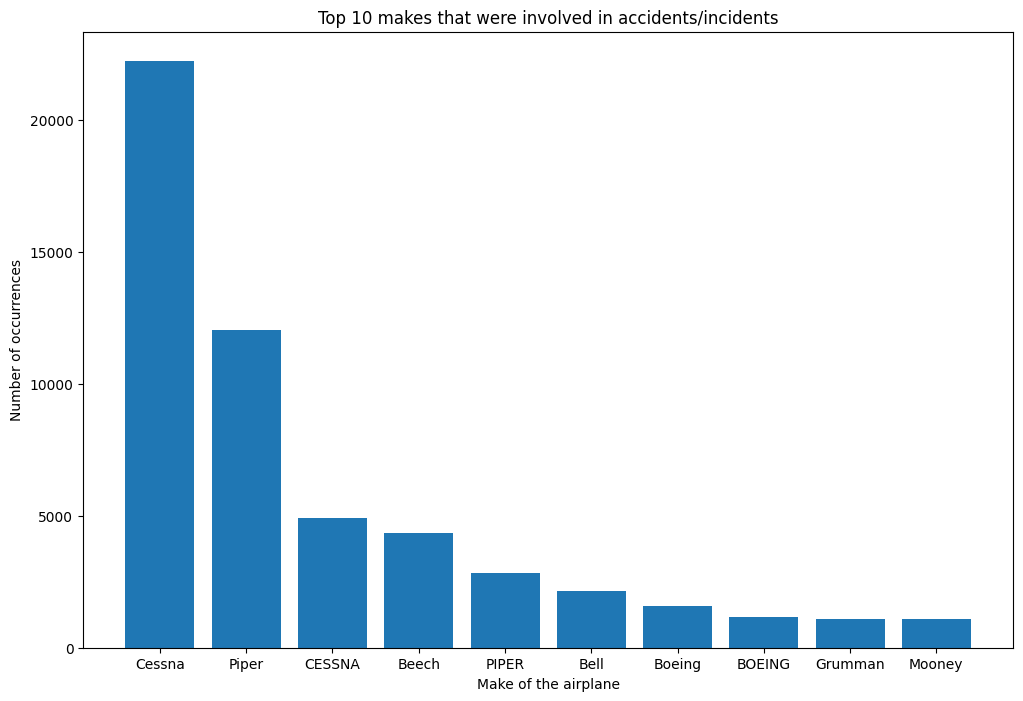

In [28]:
#visualising top 10 Makes 

top_10_makes = dropped_col_df["Make"].value_counts().head(10)

# cmap = cm.get_cmap('Blues', len(top_10_makes))

plt.figure(figsize=(12,8))
plt.bar(top_10_makes.index, top_10_makes.values)

plt.xlabel("Make of the airplane")
plt.ylabel("Number of occurrences")
plt.title("Top 10 makes that were involved in accidents/incidents")
plt.show()



In [29]:
dropped_col_df["Broad.phase.of.flight"].value_counts()


Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [30]:
#landing - percentage of accidents


landing = dropped_col_df[dropped_col_df["Broad.phase.of.flight"] =="Landing"]

len(landing) / len(dropped_col_df)

0.1735647830440212

In [31]:
#takeoff - percentage of accidents


takeoff = dropped_col_df[dropped_col_df["Broad.phase.of.flight"] =="Takeoff"]

len(takeoff) / len(dropped_col_df)

0.1405460743174071

In [32]:
#cruise - percentage of accidents


cruise = dropped_col_df[dropped_col_df["Broad.phase.of.flight"] =="Cruise"]

len(cruise) / len(dropped_col_df)

0.115526105592368

In [33]:
#personal fligths' percentage

personal = dropped_col_df[dropped_col_df["Purpose.of.flight"] == 'Personal']

len(personal) / len(dropped_col_df)


0.5562893046383692

In [34]:
#instructional fligths' percentage

instructional = dropped_col_df[dropped_col_df["Purpose.of.flight"] == 'Instructional']

len(instructional) / len(dropped_col_df)


0.11926110092362384

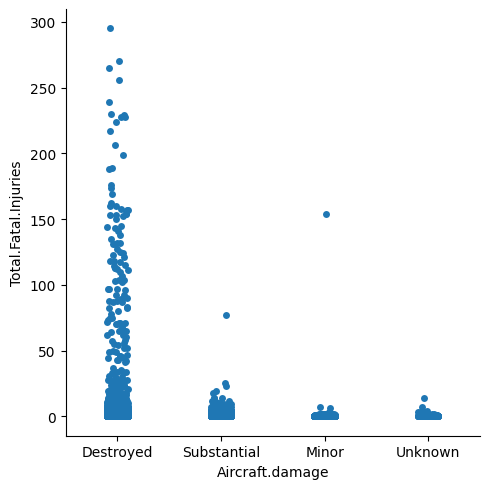

In [35]:
sns.catplot(x='Aircraft.damage',y='Total.Fatal.Injuries',data=dropped_col_df);


In [36]:
# analyzing the total fatal injuries

dropped_col_df["Total.Fatal.Injuries"].describe()

count    77488.000000
mean         0.647855
std          5.485960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: Total.Fatal.Injuries, dtype: float64

In [38]:
dropped_col_df['Total.Fatal.Injuries'] = dropped_col_df["Total.Fatal.Injuries"].fillna(dropped_col_df["Total.Fatal.Injuries"].mean())

In [40]:
percentile_99 = np.percentile(dropped_col_df["Total.Fatal.Injuries"], 99)
percentile_99

# In 99% of records the number of casualties is 5 or fewer.

5.0

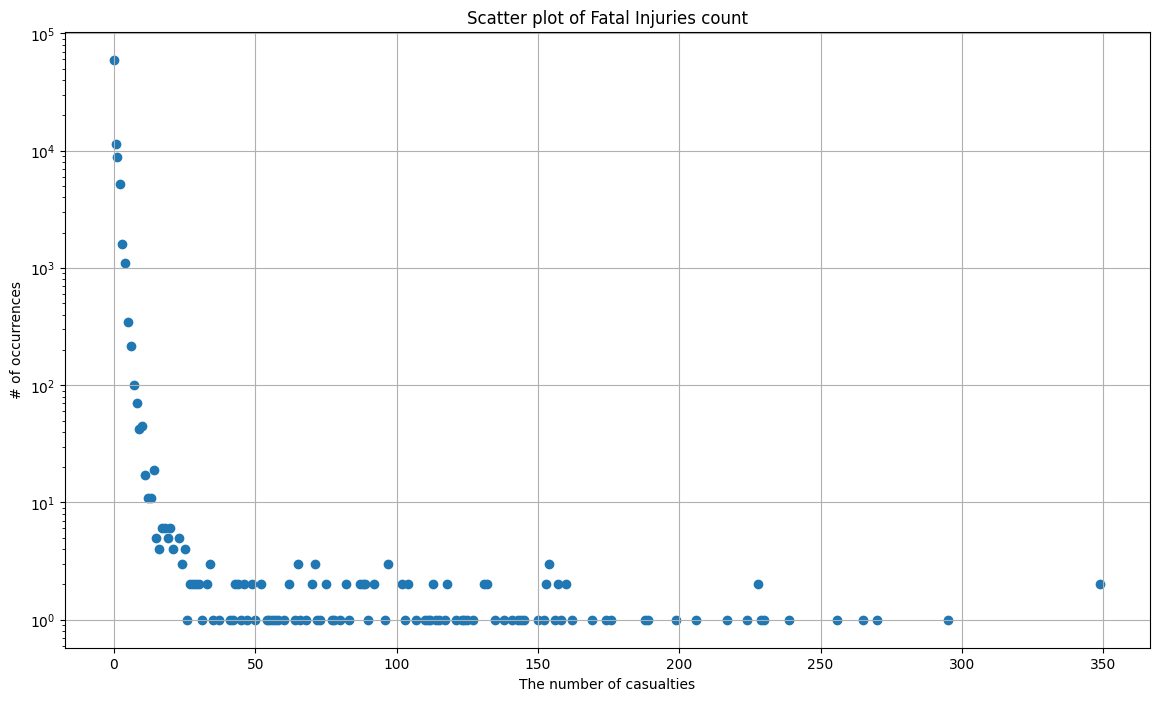

In [42]:
#creating scatter plot to make data more readable / easily visible

counts_fatal = dropped_col_df["Total.Fatal.Injuries"].value_counts()

plt.figure(figsize=(14,8))
plt.scatter(counts_fatal.index, counts_fatal)
plt.yscale("log")
plt.xlabel("The number of casualties")
plt.ylabel("# of occurrences")
plt.title("Scatter plot of Fatal Injuries count")
plt.grid()
plt.show()

In [44]:

dropped_col_df["Death.Ratio"] =  dropped_col_df["Total.Fatal.Injuries"]/(dropped_col_df["Total.Fatal.Injuries"] + dropped_col_df["Total.Serious.Injuries"]+ dropped_col_df["Total.Minor.Injuries"]+ dropped_col_df["Total.Uninjured"])

In [45]:

# Data preprocessing - Pipeline - imputing missing data (for numeric values imputing a mean, for categorical ones imputing the most frequent 
# preparing data for modelling



numeric_features = ["Number.of.Engines"]
categorical_features = ["Investigation.Type", "Aircraft.damage", "Amateur.Built",  "Engine.Type", "Purpose.of.flight", "Weather.Condition", "Broad.phase.of.flight"]

numeric_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="mean")), ('scaling', StandardScaler())])
categorical_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="most_frequent")), ('onehot', OneHotEncoder(sparse_output=False))])


transformer = ColumnTransformer(transformers= [('num', numeric_pipeline, numeric_features),
                                               ('cat', categorical_pipeline, categorical_features)],
                                               
                                              )

transformed_data = pd.DataFrame(transformer.fit_transform(dropped_col_df), columns = transformer.get_feature_names_out())

In [46]:
#checkin the shape of a newly created DataFrame
transformed_data.shape

(88889, 63)

In [47]:
#checking Nans - no missing values in DF
transformed_data.isna().any().any()

False

In [48]:
# correlation matrix of analyzed data
transformed_data.corr()

,num__Number.of.Engines,cat__Investigation.Type_Accident,cat__Investigation.Type_Incident,cat__Aircraft.damage_Destroyed,cat__Aircraft.damage_Minor,cat__Aircraft.damage_Substantial,cat__Aircraft.damage_Unknown,cat__Amateur.Built_No,cat__Amateur.Built_Yes,cat__Engine.Type_Electric,cat__Engine.Type_Geared Turbofan,cat__Engine.Type_Hybrid Rocket,cat__Engine.Type_LR,cat__Engine.Type_NONE,cat__Engine.Type_Reciprocating,cat__Engine.Type_Turbo Fan,cat__Engine.Type_Turbo Jet,cat__Engine.Type_Turbo Prop,cat__Engine.Type_Turbo Shaft,cat__Engine.Type_UNK,cat__Engine.Type_Unknown,cat__Purpose.of.flight_ASHO,cat__Purpose.of.flight_Aerial Application,cat__Purpose.of.flight_Aerial Observation,cat__Purpose.of.flight_Air Drop,cat__Purpose.of.flight_Air Race show,cat__Purpose.of.flight_Air Race/show,cat__Purpose.of.flight_Banner Tow,cat__Purpose.of.flight_Business,cat__Purpose.of.flight_Executive/corporate,cat__Purpose.of.flight_External Load,cat__Purpose.of.flight_Ferry,cat__Purpose.of.flight_Firefighting,cat__Purpose.of.flight_Flight Test,cat__Purpose.of.flight_Glider Tow,cat__Purpose.of.flight_Instructional,cat__Purpose.of.flight_Other Work Use,cat__Purpose.of.flight_PUBL,cat__Purpose.of.flight_PUBS,cat__Purpose.of.flight_Personal,cat__Purpose.of.flight_Positioning,cat__Purpose.of.flight_Public Aircraft,cat__Purpose.of.flight_Public Aircraft - Federal,cat__Purpose.of.flight_Public Aircraft - Local,cat__Purpose.of.flight_Public Aircraft - State,cat__Purpose.of.flight_Skydiving,cat__Purpose.of.flight_Unknown,cat__Weather.Condition_IMC,cat__Weather.Condition_UNK,cat__Weather.Condition_Unk,cat__Weather.Condition_VMC,cat__Broad.phase.of.flight_Approach,cat__Broad.phase.of.flight_Climb,cat__Broad.phase.of.flight_Cruise,cat__Broad.phase.of.flight_Descent,cat__Broad.phase.of.flight_Go-around,cat__Broad.phase.of.flight_Landing,cat__Broad.phase.of.flight_Maneuvering,cat__Broad.phase.of.flight_Other,cat__Broad.phase.of.flight_Standing,cat__Broad.phase.of.flight_Takeoff,cat__Broad.phase.of.flight_Taxi,cat__Broad.phase.of.flight_Unknown
num__Number.of.Engines,1.000000,-0.310535,0.310535,0.027689,0.227289,-0.118896,-0.001386,0.104789,-0.104789,0.036495,0.021093,-0.001141,0.075434,-0.012620,-0.322038,0.451849,0.204268,0.195348,-0.001004,-0.001141,-0.130606,0.006738,-0.076315,-0.024580,-0.000405,-0.017004,-0.016429,-0.011245,0.062799,0.121906,-0.006305,0.037304,0.015841,0.012736,-0.018218,-0.077407,-0.020219,-0.001141,0.001610,-0.135188,0.090967,-0.006143,0.008194,-0.003217,-0.001202,0.004651,0.281544,0.138540,0.020985,0.026357,-0.140856,0.033193,0.049942,0.006036,0.028095,-0.001682,-0.029157,-0.074550,-0.000507,0.060497,-0.011161,0.080320,0.000851
cat__Investigation.Type_Accident,-0.310535,1.000000,-1.000000,0.108813,-0.613310,0.149019,-0.025338,-0.062171,0.062171,-0.002931,-0.054433,0.000716,0.001013,0.001013,0.236888,-0.326120,-0.130861,-0.082332,0.010690,0.000716,-0.013804,0.001754,0.048538,0.018509,0.002375,0.005476,0.005501,0.007200,0.016210,-0.018150,0.006464,0.006017,0.004529,0.004624,0.005214,0.057130,0.013072,0.000716,0.001432,0.033358,-0.005421,0.003922,0.004133,0.004251,0.001621,0.008450,-0.199521,0.002079,-0.035374,-0.036167,0.018061,0.016306,-0.035139,0.014230,-0.010230,0.019788,-0.050043,0.060727,-0.004240,-0.026764,0.029248,-0.033663,0.008365
cat__Investigation.Type_Incident,0.310535,-1.000000,1.000000,-0.108813,0.613310,-0.149019,0.025338,0.062171,-0.062171,0.002931,0.054433,-0.000716,-0.001013,-0.001013,-0.236888,0.326120,0.130861,0.082332,-0.010690,-0.000716,0.013804,-0.001754,-0.048538,-0.018509,-0.002375,-0.005476,-0.005501,-0.007200,-0.016210,0.018150,-0.006464,-0.006017,-0.004529,-0.004624,-0.005214,-0.057130,-0.013072,-0.000716,-0.001432,-0.033358,0.005421,-0.003922,-0.004133,-0.004251,-0.001621,-0.008450,0.199521,-0.002079,0.035374,0.036167,-0.018061,-0.016306,0.035139,-0.014230,0.010230,-0.019788,0.050043,-0.060727,0.004240,0.026764,-0.029248,0.033663,-0.008365
cat__Aircraft.damage_Destroyed,0.027689,0.108813,-0.108813,1.000000,-0.

In [49]:
#replacing Nans in Death Ratio column with a mean

death_ratio_mean = dropped_col_df["Death.Ratio"].mean()
dropped_col_df["Death.Ratio"].fillna(death_ratio_mean, inplace=True)

In [160]:

X = transformed_data
y = dropped_col_df["Death.Ratio"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_train.shape, y_test.shape, y_test.shape

((71111, 63), (71111, 63), (17778,), (17778,))

In [ ]:
# X_reg = transformed_data

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y, test_size=0.2)



In [51]:
# creating a model to predict fatal injuries 

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [54]:
coefficients = reg_model.coef_

sorted_indices = np.argsort(np.abs(coefficients))[::-1]

sorted_coefficients = coefficients[sorted_indices]

feature_names = transformed_data.columns

for idx, coef in zip(sorted_indices, sorted_coefficients):
    print(f"{feature_names[idx]}: {coef}")

cat__Amateur.Built_Yes: 208659815918.70444
cat__Amateur.Built_No: 208659815918.66116
cat__Purpose.of.flight_ASHO: 152488374891.63333
cat__Purpose.of.flight_Glider Tow: 152488374891.53082
cat__Purpose.of.flight_Air Race show: 152488374891.5301
cat__Purpose.of.flight_Firefighting: 152488374891.44095
cat__Purpose.of.flight_External Load: 152488374891.4117
cat__Purpose.of.flight_Banner Tow: 152488374891.37924
cat__Purpose.of.flight_Public Aircraft - State: 152488374891.36774
cat__Purpose.of.flight_Flight Test: 152488374891.36703
cat__Purpose.of.flight_Aerial Observation: 152488374891.3608
cat__Purpose.of.flight_Personal: 152488374891.3493
cat__Purpose.of.flight_Business: 152488374891.3451
cat__Purpose.of.flight_Positioning: 152488374891.3337
cat__Purpose.of.flight_Other Work Use: 152488374891.33212
cat__Purpose.of.flight_Public Aircraft: 152488374891.33173
cat__Purpose.of.flight_Unknown: 152488374891.32407
cat__Purpose.of.flight_Public Aircraft - Federal: 152488374891.32346
cat__Purpose.of

In [55]:
y_pred_reg = reg_model.predict(X_test)

In [56]:
#ratios mae, mape

reg_mae = mae(y_test, y_pred_reg)

reg_mse = mse(y_test, y_pred_reg)

reg_rmse = np.sqrt(reg_mse)

In [65]:
print(f"Mean squared error for linear regression: {reg_mse}")
print(f"Root mean squared error for linear regression: {reg_rmse}")
print(f"Mean absolute error for linear regression: {reg_mae}")



Mean squared error for linear regression: 0.07544313313609477
Root mean squared error for linear regression: 0.2746691339340749
Mean absolute error for linear regression: 0.18699822310686257


In [66]:
# r2 ratio

r2_reg = r2_score(y_test, y_pred_reg)

print(f"R2 score for linear regression: {r2_reg}")

R2 score for linear regression: 0.34695603100955874


In [67]:
# creating decision tree model to see which features are the most important in the model

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

In [68]:
#ratios mae, mape, mse, rmse for decision tree

tree_mae = mae(y_test, y_pred_tree)
tree_mse = mse(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)

In [69]:
print(f"Mean squared error for decision tree: {tree_mse}")
print(f"Root mean squared error for decision tree: {tree_rmse}")
print(f"Mean absolute error for decision tree: {tree_mae}")


Mean squared error for decision tree: 0.07503210640809421
Root mean squared error for decision tree: 0.27391989049372484
Mean absolute error for decision tree: 0.17425337381159767


In [81]:
# r2 ratio - the result indicates that the model is poorly fit to the data

r2_tree = r2_score(y_test, y_pred_tree)

print(f"R2 score: {r2_tree}")

R2 score: -0.452723062997201


In [82]:
# decision tree - looking for the most important features to create a new model containing only the most important features


feature_importances = tree.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [83]:
feature_importance_df.sort_values('Importance', ascending=False).head(10)

,Feature,Importance
3,cat__Aircraft.damage_Destroyed,0.735424
50,cat__Weather.Condition_VMC,0.044722
0,num__Number.of.Engines,0.030256
22,cat__Purpose.of.flight_Aerial Application,0.016030
56,cat__Broad.phase.of.flight_Landing,0.015998
60,cat__Broad.phase.of.flight_Takeoff,0.013175
62,cat__Broad.phase.of.flight_Unknown,0.009066
46,cat__Purpose.of.flight_Unknown,0.007969
14,cat__Engine.Type_Reciprocating,0.007615
39,cat__Purpose.of.flight_Personal,0.007570


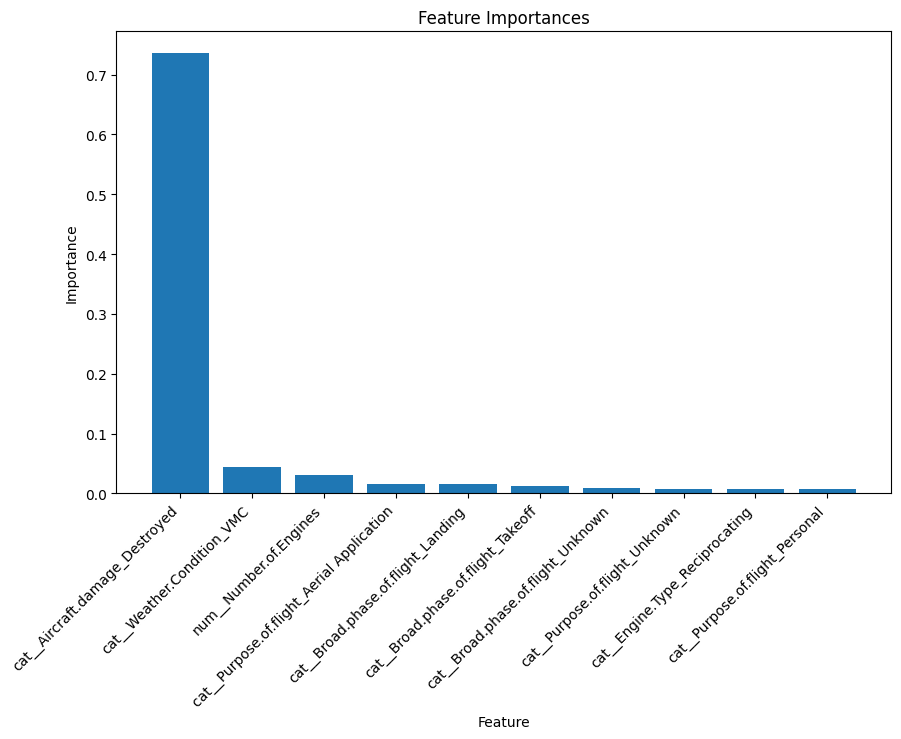

In [84]:
plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importance_df['Importance'].head(10), align='center')
plt.xticks(range(10), feature_importance_df['Feature'].head(10), rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [85]:
# creating a new model with the most important features (basen on the plot above)

X_trimmed = transformed_data[['cat__Aircraft.damage_Destroyed', 'cat__Weather.Condition_VMC', 'num__Number.of.Engines', 'cat__Broad.phase.of.flight_Landing', 'cat__Purpose.of.flight_Aerial Application', 'cat__Broad.phase.of.flight_Takeoff']]

X_train_trimmed, X_test_trimmed, y_train, y_test = train_test_split(X_trimmed, y, test_size=0.2)



In [86]:
tree_trimmed = DecisionTreeRegressor(max_depth=4, min_samples_leaf=20).fit(X_train_trimmed, y_train)

y_pred_tree_trimmed = tree_trimmed.predict(X_test_trimmed)


trimmed_tree_mae = mae(y_test, y_pred_tree_trimmed)

trimmed_tree_mape = mape(y_test, y_pred_tree_trimmed)

trimmed_tree_mse = mse(y_test, y_pred_tree_trimmed)

trimmed_tree_rmse = np.sqrt(trimmed_tree_mse)


In [87]:
print(f"Mean squared error for decision tree: {trimmed_tree_mse}")
print(f"Root mean squared error for decision tree: {trimmed_tree_rmse}")
print(f"Mean absolute error for decision tree: {trimmed_tree_mae}")

Mean squared error for decision tree: 0.07645117587542782
Root mean squared error for decision tree: 0.2764980576340959
Mean absolute error for decision tree: 0.18484239357777282


In [88]:
# r2 ratio

r2_trimmed_tree = r2_score(y_test, y_pred_tree_trimmed)

print(f"R2 score: {r2_trimmed_tree}")

R2 score: 0.34399777204366233


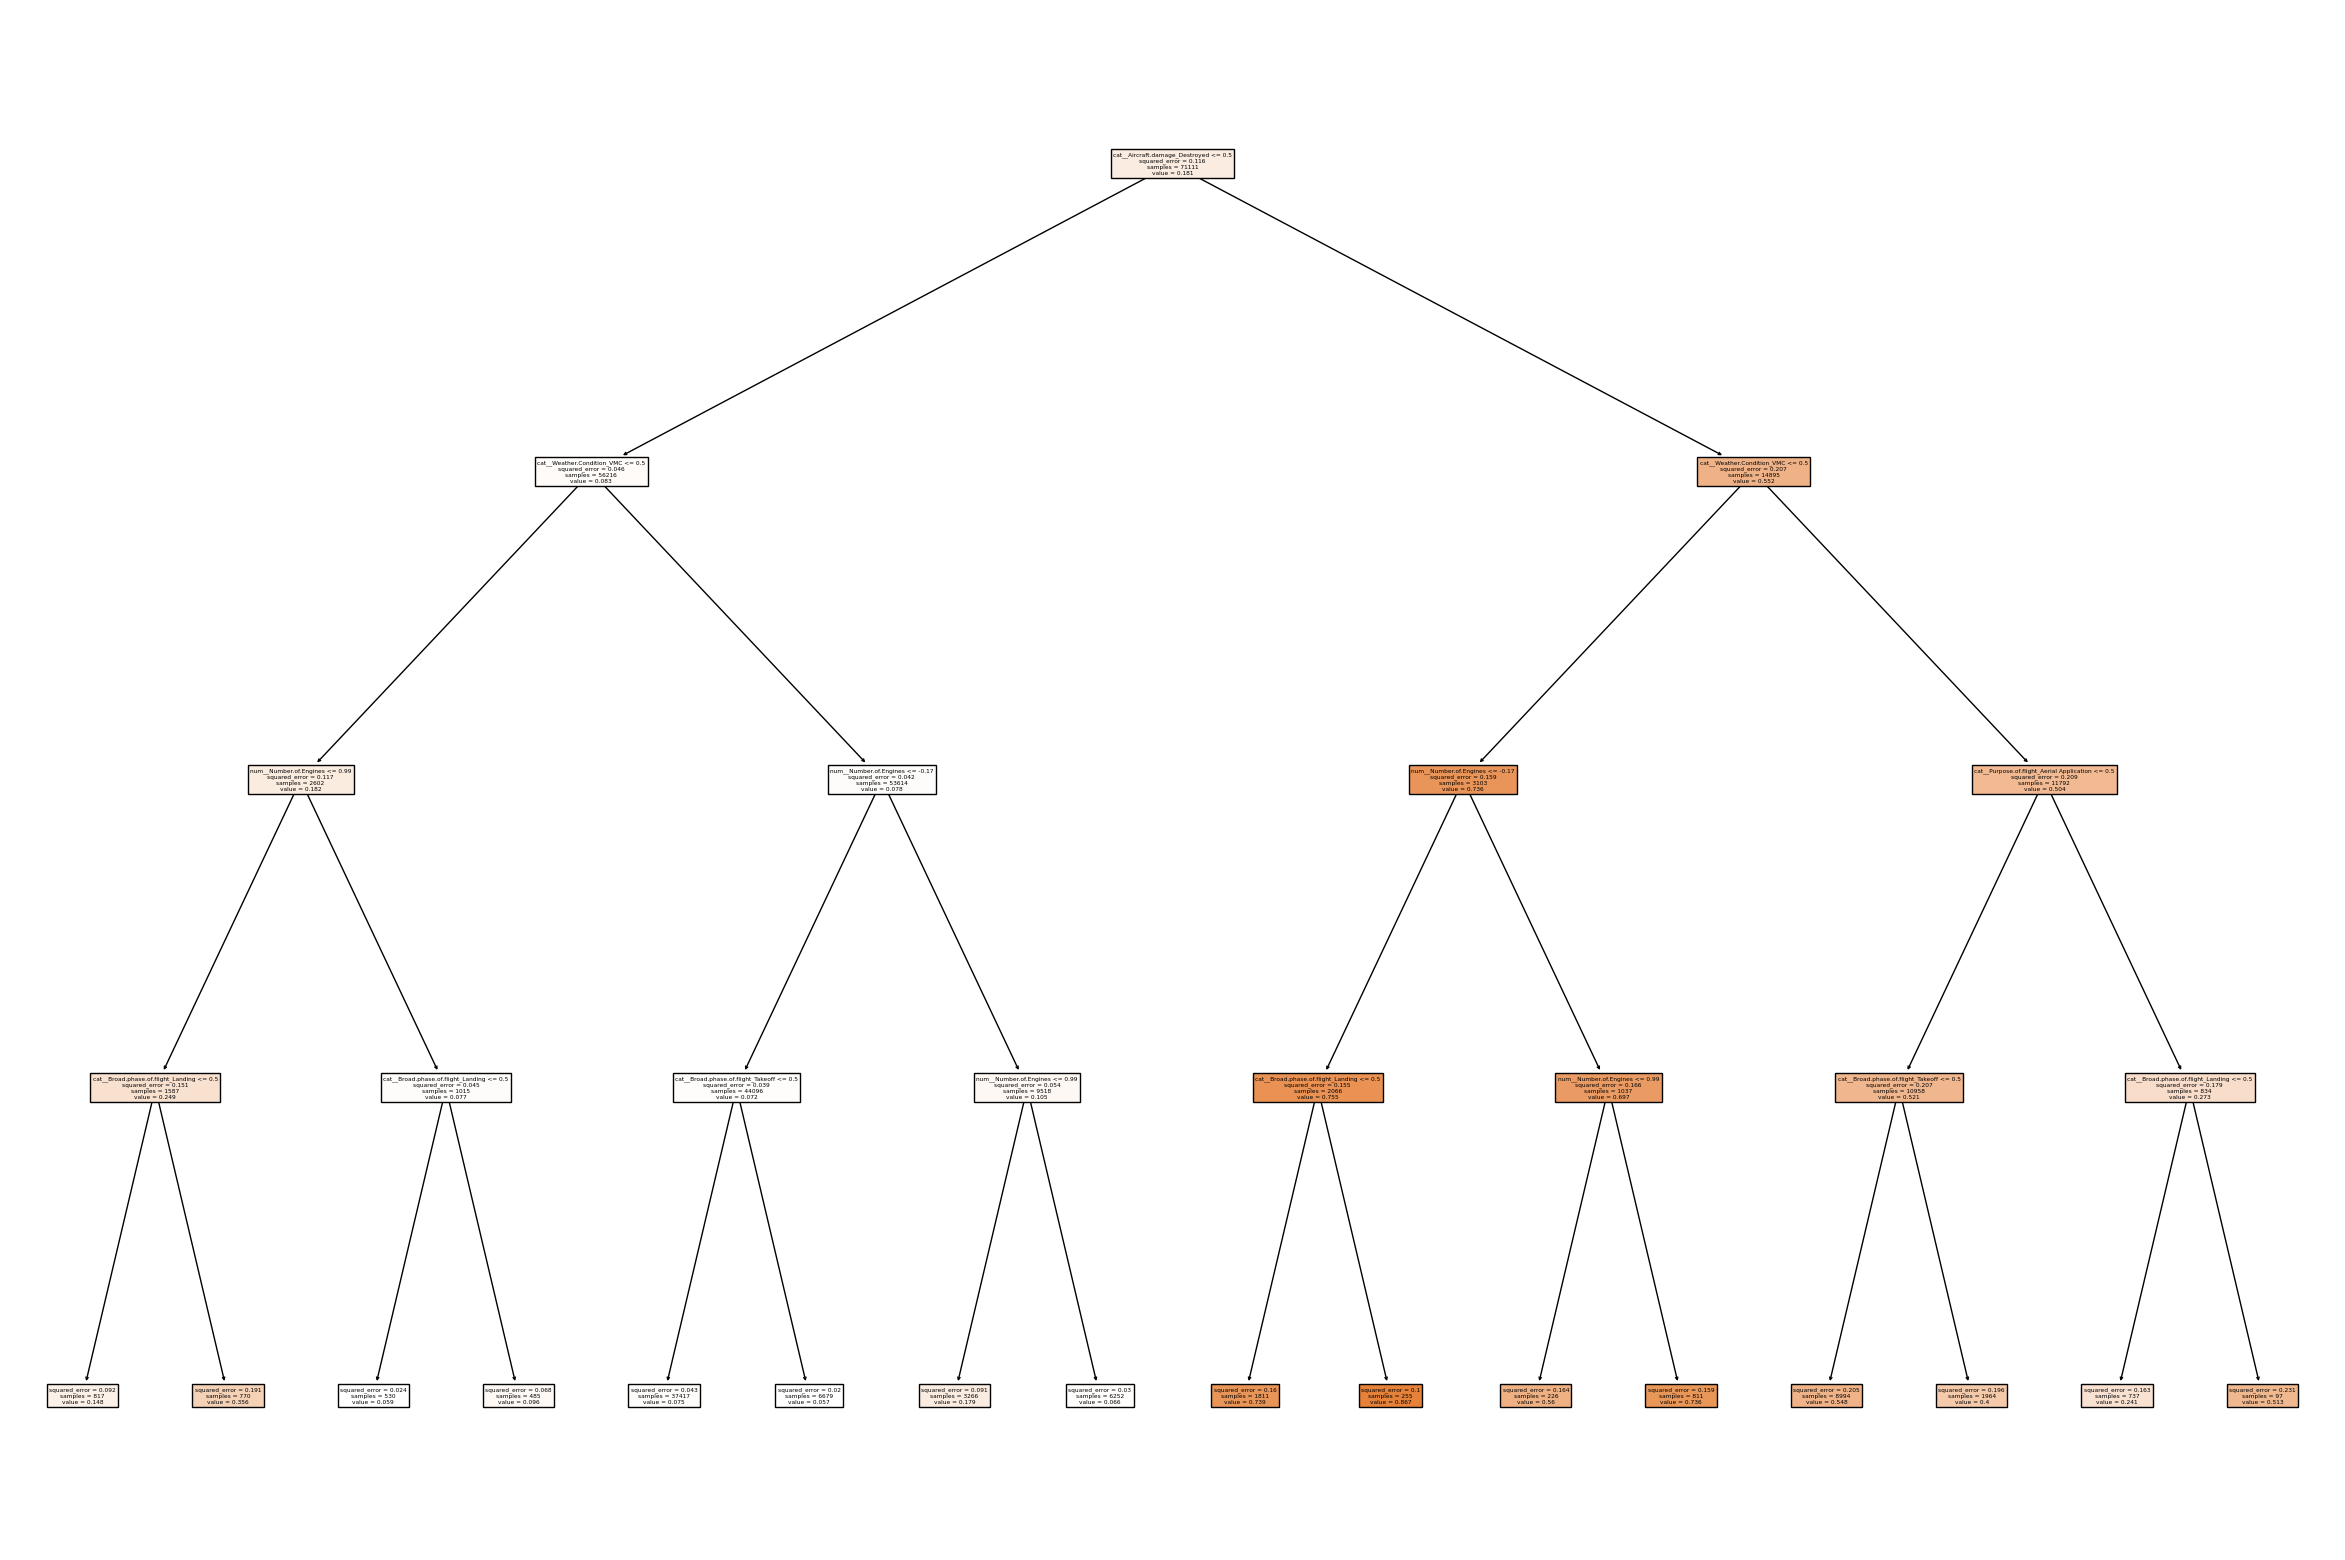

In [89]:
fea_nam = X_trimmed.columns
colors = ['lightblue', 'lightcoral']
plt.figure(figsize=(30,20))
plot_tree(tree_trimmed, feature_names = fea_nam, filled=True)


plt.show()

In [ ]:
# # random forest
# # GridSearchCV

rf_model = RandomForestRegressor(random_state=42)

param_grid = {'max_depth': [2,3,4,5,6],
               'n_estimators': [50, 100, 150],
               'min_samples_split': [200, 300, 400, 600],
               'min_samples_leaf': [100, 200, 300, 400]}



grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv =5,scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Mean Squared Error: ", grid_search.best_score_)


In [90]:
rf_best_param = RandomForestRegressor(max_depth=2, min_samples_leaf=400, min_samples_split=200, n_estimators=150)
rf_best_param.fit(X_train, y_train)

y_pred_rf_best_param = rf_best_param.predict(X_test)

In [92]:
rf_best_param_mae = mae(y_test, y_pred_rf_best_param)

rf_best_param_mse = mse(y_test, y_pred_rf_best_param)

rf_best_param_rmse = np.sqrt(rf_best_param_mse)


In [93]:
print(f"Mean squared error for random forest: {rf_best_param_mse}")
print(f"Root mean squared error for random forest: {rf_best_param_rmse}")
print(f"Mean absolute error for random forest: {rf_best_param_mae}")


Mean squared error for random forest: 0.11653998905884991
Root mean squared error for random forest: 0.34137953813731997
Mean absolute error for random forest: 0.23956441428997075


In [94]:
# r2 ratio

r2_rf_best_param = r2_score(y_test, y_pred_rf_best_param)

print(f"R2 score: {r2_rf_best_param}")

R2 score: 8.939127583706963e-06


In [161]:
import xgboost as xgb

xg_model = xgb.XGBRegressor(n_estimators = 100, learning_rate =0.1, max_depth = 4)

xg_model.fit(X_train, y_train)

y_pred_xg = xg_model.predict(X_test)

In [162]:
xg_mae_test = mae(y_test, y_pred_xg)
xg_mse_test = mse(y_test, y_pred_xg)
xg_rmse_test = np.sqrt(xg_mse_test)

print(f"Mean squared error for xgboost: {xg_mse_test}")
print(f"Root mean squared error for xgboost: {xg_rmse_test}")
print(f"Mean absolute error for xgboost: {xg_mae_test}")

# r2 ratio

r2_xg_test = r2_score(y_test, y_pred_xg)

print(f"R2 score: {r2_xg_test}")

Mean squared error for xgboost: 0.07506866305192213
Root mean squared error for xgboost: 0.2739866110814945
Mean absolute error for xgboost: 0.1826640925240716
R2 score: 0.36393046004746077


In [132]:
#creating models (modelling death ratio) based on more features - the number of Uninjured, Minor injuries and serious injuries have been included


aviation['Investigation.Type'] = aviation['Investigation.Type'].astype('category').cat.codes
aviation['Aircraft.damage'] = aviation['Aircraft.damage'].astype('category').cat.codes
aviation['Aircraft.Category'] = aviation['Aircraft.Category'].astype('category').cat.codes
aviation['Engine.Type'] = aviation['Engine.Type'].astype('category').cat.codes
aviation['Purpose.of.flight'] = aviation['Purpose.of.flight'].astype('category').cat.codes
aviation['Weather.Condition'] = aviation['Weather.Condition'].astype('category').cat.codes
aviation['Broad.phase.of.flight'] = aviation['Broad.phase.of.flight'].astype('category').cat.codes

In [133]:

aviation["Death.Ratio"] =  aviation["Total.Fatal.Injuries"]/(aviation["Total.Fatal.Injuries"] + aviation["Total.Serious.Injuries"]+ aviation["Total.Minor.Injuries"]+ aviation["Total.Uninjured"])

In [134]:
aviation = aviation[aviation['Death.Ratio'].notna()]

In [135]:
aviation['Total.Uninjured'].fillna(aviation['Total.Uninjured'].mean(), inplace=True)
aviation['Total.Minor.Injuries'].fillna(aviation['Total.Minor.Injuries'].mean(), inplace=True)
aviation['Total.Serious.Injuries'].fillna(aviation['Total.Serious.Injuries'].mean(), inplace=True)
aviation['Number.of.Engines'].fillna(aviation['Number.of.Engines'].mean(), inplace=True)

In [137]:
aviation['Aircraft.Category'].fillna('Unknown',inplace=True)

aviation['Engine.Type'].fillna('Others',inplace=True)
aviation['Engine.Type'].replace(['None','Unknown'],'Others')

aviation['Purpose.of.flight'].fillna('Unknown',inplace=True)
aviation['Weather.Condition'].fillna('UNK',inplace=True)
aviation['Broad.phase.of.flight'].fillna('UNKNOWN',inplace=True)

In [100]:
# prepare pre
X_new = aviation[['Investigation.Type','Aircraft.damage','Aircraft.Category',
            'Number.of.Engines','Engine.Type','Purpose.of.flight',
            'Total.Serious.Injuries','Total.Minor.Injuries',
            'Total.Uninjured','Weather.Condition','Broad.phase.of.flight'
    ]]

y_new = aviation['Death.Ratio']


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.25,shuffle=True)

print('Training Features Shape:', X_train_new.shape)
print('Training Labels Shape:', y_train_new.shape)
print('Testing Features Shape:', X_test_new.shape)
print('Testing Labels Shape:', y_test_new.shape)

Training Features Shape: (54957, 11)
Training Labels Shape: (54957,)
Testing Features Shape: (18319, 11)
Testing Labels Shape: (18319,)


In [138]:
reg_model_new = LinearRegression()
reg_model_new.fit(X_train_new, y_train_new)

LinearRegression()

In [139]:
print('Intercept of Regression \t: b = ', reg_model_new.intercept_)
print('Coefficients of Regression \t: a = ', reg_model_new.coef_)
print()
# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train_new.columns, reg_model_new.coef_)), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  0.6517495335357573
Coefficients of Regression 	: a =  [-0.43168134 -0.21671305  0.00886951  0.02692912 -0.00351666  0.00337511
 -0.01350463 -0.01765401 -0.0017421  -0.06397045 -0.00598088]



,Predictors,Coefficients
0,Investigation.Type,-0.431681
1,Aircraft.damage,-0.216713
2,Aircraft.Category,0.008870
3,Number.of.Engines,0.026929
4,Engine.Type,-0.003517
5,Purpose.of.flight,0.003375
6,Total.Serious.Injuries,-0.013505
7,Total.Minor.Injuries,-0.017654
8,Total.Uninjured,-0.001742
9,Weather.Condition,-0.063970


In [140]:
y_pred_reg_new = reg_model_new.predict(X_test_new)

In [141]:
reg_model_new_mae = mae(y_test_new, y_pred_reg_new)


reg_model_new_mse = mse(y_test_new, y_pred_reg_new)

reg_model_new_rmse = np.sqrt(reg_model_new_mse)



In [142]:
print(f"Mean squared error for decision tree: {reg_model_new_mse}")
print(f"Root mean squared error for decision tree: {reg_model_new_rmse}")
print(f"Mean absolute error for decision tree: {reg_model_new_mae}")


Mean squared error for decision tree: 0.08974355461943909
Root mean squared error for decision tree: 0.2995722861338129
Mean absolute error for decision tree: 0.19747814477419473


In [143]:
# r2 ratio

r2_reg_lin_new = r2_score(y_test_new, y_pred_reg_new)

print(f"R2 score: {r2_reg_lin_new}")

R2 score: 0.3648502755964059


In [145]:
rf_new = RandomForestRegressor(n_estimators=100)
rf_new.fit(X_train_new, y_train_new)

y_rf_new_pred = rf_new.predict(X_test_new)

In [146]:
# r2 ratio

r2_rf_new = r2_score(y_test_new, y_rf_new_pred)

print(f"R2 score: {r2_rf_new}")

R2 score: 0.9520944500024617


In [147]:

feature_importances = rf_new.feature_importances_
feature_names = X_new.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [148]:
feature_importance_df.sort_values('Importance', ascending=False).head(10)

#adding information regarding serious, minor and lack of injuries to the model results in creating a model in which these mentioned features are the only important. 

,Feature,Importance
6,Total.Serious.Injuries,0.370461
8,Total.Uninjured,0.355061
7,Total.Minor.Injuries,0.246547
5,Purpose.of.flight,0.006266
1,Aircraft.damage,0.005921
10,Broad.phase.of.flight,0.005696
4,Engine.Type,0.002784
9,Weather.Condition,0.002640
3,Number.of.Engines,0.002445
2,Aircraft.Category,0.002053


In [157]:
# creating models predicting the number of fatal injuries 
X = transformed_data
y = dropped_col_df["Total.Fatal.Injuries"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_train.shape, y_test.shape, y_test.shape

((71111, 63), (71111, 63), (17778,), (17778,))

In [150]:
rf_fatal = RandomForestRegressor().fit(X_train, y_train)

In [118]:
#prediction on training dataset
y_pred_fatal_rf = rf_fatal.predict(X_train)

In [151]:
rf_fatal_mae = mae(y_train, y_pred_fatal_rf)

rf_fatal_mse = mse(y_train, y_pred_fatal_rf)

rf_fatal_rmse = np.sqrt(rf_fatal_mse)


In [152]:
print(f"Mean squared error for random forest - training set: {rf_fatal_mse}")
print(f"Root mean squared error forrandom forest - training set: {rf_fatal_rmse}")
print(f"Mean absolute error for random forest - training set: {rf_fatal_mae}")

# r2 ratio

r2_rf_fatal = r2_score(y_train, y_pred_fatal_rf)

print(f"R2 score: {r2_rf_fatal}")

Mean squared error for random forest - training set: 33.90095921017624
Root mean squared error forrandom forest - training set: 5.8224530234409135
Mean absolute error for random forest - training set: 1.051860806811272
R2 score: -0.2457258895365606


In [156]:
#prediction on testing dataset
y_pred_rf_fatal_test = rf_fatal.predict(X_test)

rf_fatal_mae_test = mae(y_test, y_pred_rf_fatal_test)


rf_fatal_mse_test = mse(y_test, y_pred_rf_fatal_test)

rf_fatal_rmse_test = np.sqrt(rf_fatal_mse_test)

print(f"Mean squared error for random forest - testing set: {rf_fatal_mse_test}")
print(f"Root mean squared error for random forest - testing set: {rf_fatal_rmse_test}")
print(f"Mean absolute error for random forest - testing set: {rf_fatal_mae_test}")

# r2 ratio

r2_rf_fatal_test = r2_score(y_test, y_pred_rf_fatal_test )

print(f"R2 score: {r2_rf_fatal_test}")

Mean squared error for random forest - testing set: 21.439397916107456
Root mean squared error for random forest - testing set: 4.6302697455016
Mean absolute error for random forest - testing set: 0.7484506331482602
R2 score: 0.03949438202657218


In [158]:
#modelling total fatal injuries
xg_model = xgb.XGBRegressor(n_estimators = 100, learning_rate =0.1, max_depth = 4)

xg_model.fit(X_train, y_train)

y_pred_xg = xg_model.predict(X_test)

In [159]:
xg_mae_test = mae(y_test, y_pred_xg)
xg_mse_test = mse(y_test, y_pred_xg)
xg_rmse_test = np.sqrt(xg_mse_test)

print(f"Mean squared error for xgboost: {xg_mse_test}")
print(f"Root mean squared error for xgboost: {xg_rmse_test}")
print(f"Mean absolute error for xgboost: {xg_mae_test}")

# r2 ratio

r2_xg_test = r2_score(y_test, y_pred_xg)

print(f"R2 score: {r2_xg_test}")

Mean squared error for xgboost: 16.4985677267026
Root mean squared error for xgboost: 4.061842897836227
Mean absolute error for xgboost: 0.7082346797068776
R2 score: 0.132489968965239
